## FINAL PROJECT

### TELCO CUSTOMER CHURN
#### SECTION 1 - PREPROCESSING & EXPLORATORY DATA ANALYSIS

***The goal of this section is to give insight regarding the behaviors of the churned or not churned customers in order to help retain customers.*** 

Data used are from the IBM Watson Repository - Sample Datasets for Customer Retention Programs, where each rows represents the customers, and each columns represents the customer’s attribute. Such as :

- ***The target*** - The target columns is ***'Churn'***. It represents the customers who retained (0) and left within the last month (1).  


- ***The service types*** - Represents what type of services each customer has signed up for, it contained : phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.


- ***The customer account information*** - Represents how long the customer's been subscibed to, this contained : contract, payment method, paperless billing, monthly charges, and total charges.


- ***The demographic info about customers*** - Contains additional info for the customers, such as : gender, senior citizenship status, and whether if they have partners and dependents.

***Coloumns Descriptions :***

- **customerID** - Customer's ID.


- **gender** - Customer's gender.


- **SeniorCitizen** - Whether the customer is a senior citizen or not.


- **Partner** - Whether the customer has a partner or not.


- **Dependents** - Whether the customer has dependents or not.


- **tenure** - How long has the customer subscribed in months.


- **PhoneService** - Whether the customer has a phone service or not.


- **MultipleLines** - Whether the customer has multiple lines or not.


- **InternetService** - Customer’s internet service provider status.


- **OnlineSecurity** - Whether the customer has online security or not. 


- **OnlineBackup** - Whether the customer has online backup or not.


- **DeviceProtection** - Whether the customer has device protection or not. 


- **TechSupport** - Whether the customer has tech support or not. 


- **StreamingTV** - Whether the customer has streaming TV or not. 


- **StreamingMovies** - Whether the customer has streaming movies or not. 


- **Contract** - The customer's contract term. 


- **PaperlessBilling** - Whether the customer has paperless billing or not.


- **PaymentMethod** - The customer’s payment method.


- **MonthlyCharges** - The amount charged to the customer (monthly).


- **TotalCharges** - The total amount charged to the customer.


- **Churn** - Whether the customer churned or not churned.

## OVERVIEW

In this section, we want to further examine the data by checking all the necessary info, check for the missing values and thus cleaning the data before the EDA process. So that it may correctly visualized and translated in the EDA process. We start this by loading all the packages needed and importing the data.

### IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

### LOAD DATA

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


We've load the data and, check the head and tail of the data, for the next process, I found that it's a little unpleasant that there are some variables name that are in a different typing than the other variables. Let's try to make some changes in those variable's column names.

In [5]:
df = df.rename(columns= {'tenure' : 'Tenure',
                         'gender' : 'Gender'})

Then, after we've done renaming said columns / variables, we need to check the information within our data so that we gained more understanding in this data. Especially we need to carefully examine the data type so that the data type matches correctly with the column / variables name.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


With some inspection, we can carefully see that the SeniorCitizen has an 'int' data type, I'd like to change this to an 'object' data type, so that all this variables has similar attributes as the other variables. In the other hand, TotalCharges variables has an 'object' type data, it should be a float, because as in the description mentioned above, the customer's TotalCharges is an accumulated of it's MonthlyCharges.

But for now we just ignore it and proceed to the data description, so that we can see more information about the variables. As for the above problem, we will handle it in the preprocessing part.

In [7]:
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,6328-ZPBGN,1
Gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


Now that we gained enough information this data overview, will start further handling the necessary problem in this preprocessing part below.

### PREPROCESSING

As mentioned above, in this part we'll try to fix the data type of the SeniorCitizen and TotalCharges variables. But first let's call the said variables and check the data types and null values.

In [9]:
pd.DataFrame({'Variables' : df[['SeniorCitizen', 'TotalCharges']].columns, 
              'Data Type' : df[['SeniorCitizen', 'TotalCharges']].dtypes, 
              'Null Values' : df[['SeniorCitizen', 'TotalCharges']].isna().sum()}).reset_index(drop = True)

,Variables,Data Type,Null Values
0,SeniorCitizen,int64,0
1,TotalCharges,object,0


Now, let's try to fix it one by one starting from the SeniorCitizen variable. As we can see, this variable is having an 'int' type. Although in later part especially in building the Machine Learning Models we would have to do some Labelling, for now, I personally would like to change it to an 'object' type. Therefore this variable / column has the same type as the other categorical variables (being 'Yes' and 'No').

In [10]:
df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'}, inplace = True)

We've done the change for this variable, let's check it and continue to the next variable below.

In [11]:
pd.DataFrame({'Variables' : df[['SeniorCitizen', 'TotalCharges']].columns, 
              'Data Type' : df[['SeniorCitizen', 'TotalCharges']].dtypes, 
              'Null Values' : df[['SeniorCitizen', 'TotalCharges']].isna().sum()}).reset_index(drop = True)

,Variables,Data Type,Null Values
0,SeniorCitizen,object,0
1,TotalCharges,object,0


Now we want to address the TotalCharges variable, we need to see why it could not be set as float in the first place. Below I'll try to locate the error in this column and we might see why this happened.

In [12]:
error_idx=[]

for idx,col in enumerate(df['TotalCharges']):
    try:
        float(col)
    except:
        error_idx.append(idx)

In [13]:
df.loc[error_idx]

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


As we can see above, it would seems that there are 11 row within the TotalCharges variable with (' ') string space character. These rows were not identified as Null, this might be caused by the (' ') string space character, while it should be Null values. So below, we'll change the data type to float and see if this problem resolves.

In [14]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

Let's check the data type again, and see if this problem has been solved.

In [15]:
pd.DataFrame({'Variables' : df[['SeniorCitizen', 'TotalCharges']].columns, 
              'Data Type' : df[['SeniorCitizen', 'TotalCharges']].dtypes, 
              'Null Values' : df[['SeniorCitizen', 'TotalCharges']].isna().sum()}).reset_index(drop = True)

,Variables,Data Type,Null Values
0,SeniorCitizen,object,0
1,TotalCharges,float64,11


The data type for TotalCharges variable has been sucessfully changed. However as we suspected before, that there are 11 Null Values after we change the data type. Below, I'll try to pinpoint this Null values.

In [16]:
df[df['TotalCharges'].isna()]

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


From above data, we can examine that the reason why there are empty string values in TotalCharges variables are probably caused by the customer whom having 0 in Tenure columns, and all of them are not a 'Churned' customers, therefore this indicated that they are maybe a new customers. In addition, all of them are NOT a Senior Citizens, yet most of them are not connected to the internet, having contract terms for at least One Year and pays the bill via Mailed Check.

Furthermore, to be fair we can also assume that maybe the TotalCharges will be updated at the end of the month as in most companies cases. Now if we look through the main dataset, we can see that if the Tenure is 1, MonthlyCharges and the TotalCharges are both having the same amounts, if the Tenure is 2, TotalCharges are having twice as the amouts of MonthlyCharges. Thus we can safely assume that the TotalCharges might be updated as the Tenure is also updated. I'll try to show it below.

In [17]:
df[df['Tenure']==1].head(3)

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,8779-QRDMV,Male,Yes,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,No,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes


In [18]:
df[df['Tenure']==2].head(3)

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
31,4929-XIHVW,Male,Yes,Yes,No,2,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No


Finally, by the argument above I'll replace the Null values within this variable with **0**, as it will still indicated the same insight.

In [19]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [20]:
pd.DataFrame({'dataFeatures' : df.columns, 'dataType' : df.dtypes, 
              'null' : df.isna().sum(), 'unique' : df.nunique(), 
              'uniqueSample' : [list(df[i].drop_duplicates().sample(2))for i in df.columns]}).reset_index(drop = True)

,dataFeatures,dataType,null,unique,uniqueSample
0,customerID,object,0,7043,"[3012-VFFMN, 0564-JJHGS]"
1,Gender,object,0,2,"[Male, Female]"
2,SeniorCitizen,object,0,2,"[No, Yes]"
3,Partner,object,0,2,"[Yes, No]"
4,Dependents,object,0,2,"[Yes, No]"
5,Tenure,int64,0,73,"[59, 1]"
6,PhoneService,object,0,2,"[Yes, No]"
7,MultipleLines,object,0,3,"[No phone service, No]"
8,InternetService,object,0,3,"[DSL, No]"
9,OnlineSecurity,object,0,3,"[No, Yes]"


We can see that we successfully change the data type and replacing the Null Values within this column. Therefore the data is completely cleaned, so that we can continue the process to the EDA.

## EXPLORATORY DATA ANALYSIS

In this part, we will start by exploring the Target first - Churn. Then giong from there, we will continue exploring the variables by splitting all the variables in two : 1. qualitative (discrete), and 2. quantitative (continous). Then finally we will examine and see the contribution of each variables to the Target - Churn, and hopefully we can infer something from the pattern of the given data.

### TARGET VARIABLES

In [21]:
sns.set_style('whitegrid')

In [22]:
churn = df['Churn'].value_counts()[1]
no_churn = df['Churn'].value_counts()[0]

print(f'TOTAL CHURNED : {churn} |', f'TOTAL RETAINED : {no_churn}')

TOTAL CHURNED : 1869 | TOTAL RETAINED : 5174


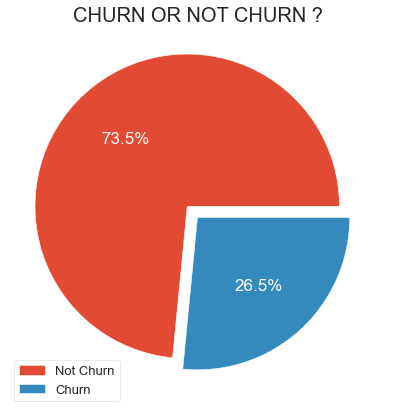

In [23]:
plt.figure(figsize = (8,7))
plt.title('CHURN OR NOT CHURN ?', fontsize = 20)

labels = 'Not Churn', 'Churn'

plt.pie(df['Churn'].value_counts(), autopct = '%.1f%%', 
        textprops = {'fontsize' : 17, 'color' : 'white'}, explode = (0.1,0))

plt.legend(labels, loc='lower left', fontsize = 13)

plt.show()

After seeing above result, I started to lookup on the internet to see what considered a ***'Good Balance'*** on the Churn rate, and found out the answer on this web site :

https://www.profitwell.com/blog/how-b2b-and-b2c-companies-solve-churn-for-different-customers

And I quote : 'B2B and B2C companies see different churn rates, on average, because of the different types of customers that they serve and retain. A 2016 Zuora study cites the average churn rate is around 24% for B2B companies, and around 31% for B2C companies.'

Therefore we can see that there are differences on what considered a ***'Good Balance'*** between Churn Rate within the B2B (Business to Business) and B2C (Business to Customer). Although the study conducted by Zuora were in 2016, but I think it's still relevant since our data was from 2018, and the year's gap isn't too much afar. Therefore, we can still apply this study's conclusion to our data. Furthermore as we can see clearly by their target market and other information within this data, we can safely concluded that this company is considered as B2C business model. 

According to the Zuora study above, we can see that the average churn rate of a B2C companies is around 31%, while in this dataset we have around 27% Churn rate. Then we could say that this company's churn rate is still considered as having a ***'Good Balance'*** of Churn and Retention rate as it's still below the average's churn rate of B2C companies.

### DISRETE VARIABLES

Now we continue to explore our data. I'll start by dividing the variables into two categories, separating them by their data types. Starting from the object data type, we categorize it as discrete variables. 

First we'll explore the Gender, Senior Citizen, Partner and Dependent variables as it contains ***the demographic info*** about customers. Then from there, we'll continue accordingly.

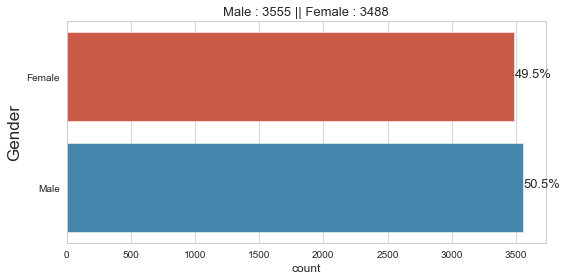

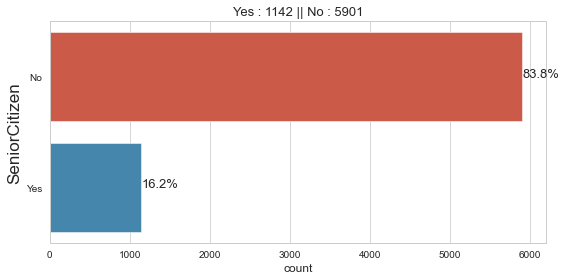

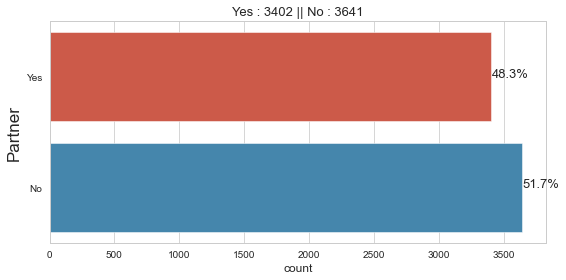

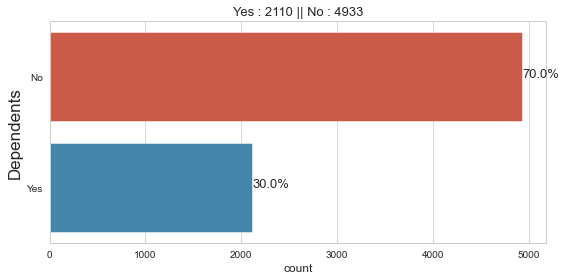

In [24]:
for col in ('Gender', 'SeniorCitizen', 'Partner', 'Dependents'):
    plt.figure(figsize=(8,4))
    ax  = sns.countplot(y= col, data = df)
    
    total = len(df[col])
    for val in ax.patches:
        pct  = '{:.1f}%'.format(100 * val.get_width()/total)
        xpos = val.get_x() + val.get_width() +1.5
        ypos = val.get_y() + val.get_height() /2 
        ax.annotate(pct, (xpos, ypos), fontsize = 13)
    
    yes  = df[col].value_counts()[1]
    no   = df[col].value_counts()[0]
    
    if col == 'Gender':
        plt.title(f'Male : {no} || Female : {yes}', fontsize = 13)
    else :
        plt.title(f'Yes : {yes} || No : {no}', fontsize = 13)
              
    plt.ylabel(col, fontsize = 17)
    plt.tight_layout()
    plt.show()

From above plots, we can infer that although we have almost evenly matches number in both Male and Female in Gender variables, but there are roughly only 16.2% of them identified as senior citizen, while the rest of it about 83.8% are not a senior citizen. While the definition of the senior citizen may vary accross the regions, but the lowest age I could find in the internet is 55 years (source : https://www.seniorliving.org/life/senior-citizen/). 

Let us assume that this is information is correct. Then this basically means that there are 83.8% of the customers are in the age of 54 or lower, which I think this is a valuable information for the company's, especially their marketing, as from this information they might find some interesting new approach to their customers. 

Moving on to Partner variable, we can see that there are 48.3% of total customers whom having a Partner, whereas the rest of them are having no Parter, might be 'single'. Yet interestingly if we see the Dependent variables, there are only 30% of total customers or 2110 customers who are having Dependent status. According to this link : https://www.1040.com/tax-guide/taxes-for-families/who-can-you-claim/, dependancy status meaning that you are usually, but not always, having a child or other relative. Seems that we've gained so much information whithin these plot only. 

Let's continue to the next variables below, it's about ***the service types***.

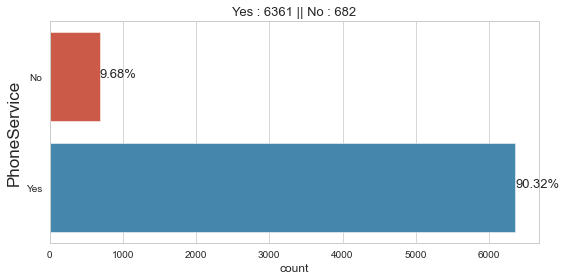

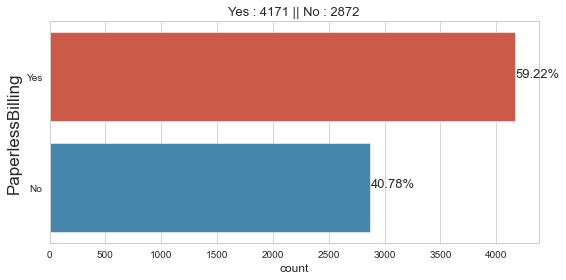

In [25]:
for col in ('PhoneService', 'PaperlessBilling'):
    plt.figure(figsize=(8,4))
    ax  = sns.countplot(y= col, data = df)
    
    total = len(df[col])
    for val in ax.patches:
        pct  = '{:.2f}%'.format(100 * val.get_width()/total)
        xpos = val.get_x() + val.get_width() +1.5
        ypos = val.get_y() + val.get_height() /2 
        ax.annotate(pct, (xpos, ypos), fontsize = 13)
    
    yes  = df[col].value_counts()[1]
    no   = df[col].value_counts()[0]
    
    plt.title(f'Yes : {no} || No : {yes}', fontsize = 13)
           
    plt.ylabel(col, fontsize = 17)
    plt.tight_layout()
    plt.show()

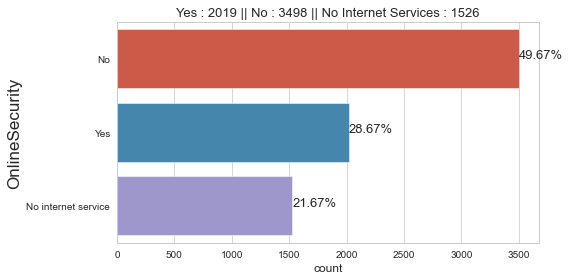

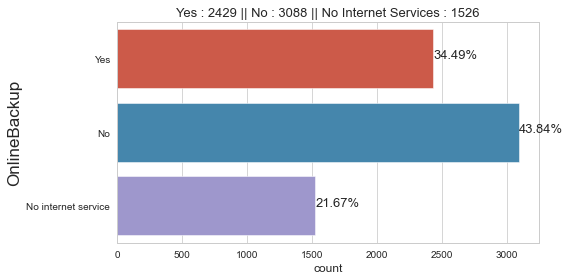

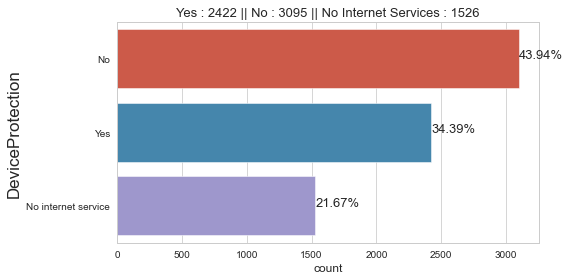

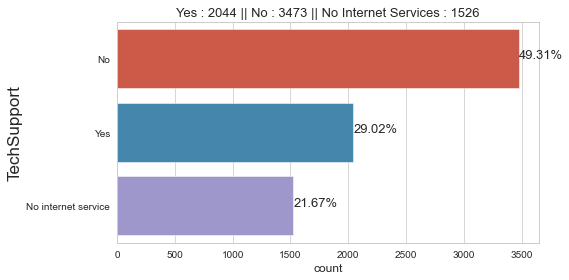

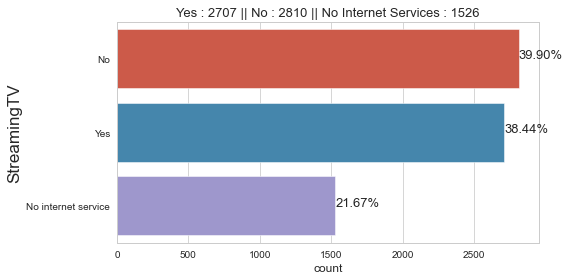

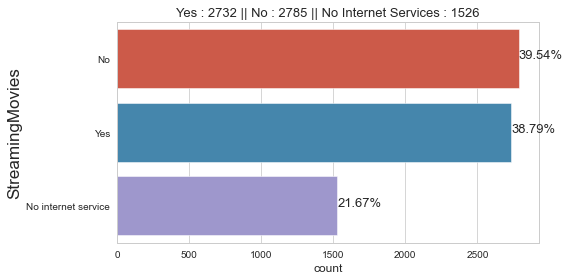

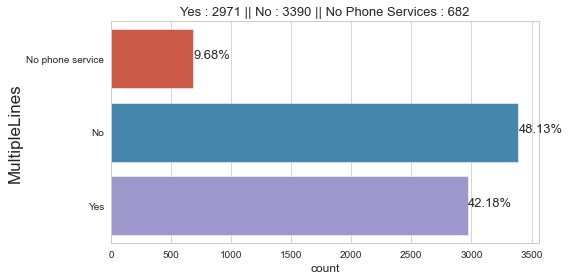

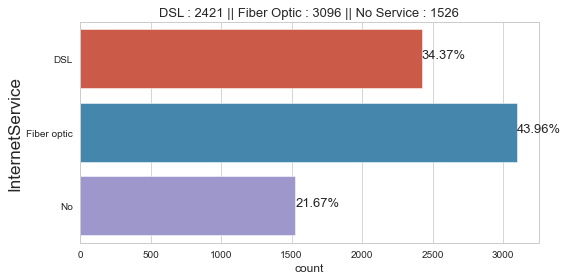

In [26]:
for col in ('OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'MultipleLines', 'InternetService'):
    plt.figure(figsize = (8,4))
    ax  = sns.countplot(y= col, data = df)
    
    total = len(df[col])
    for val in ax.patches:
        pct = '{:.2f}%'.format(100 * val.get_width()/total)
        xpos = val.get_x() + val.get_width() +1.5
        ypos = val.get_y() + val.get_height() /2 
        ax.annotate(pct, (xpos, ypos), fontsize = 13)
        
    yes = df[col].value_counts()[1]
    no  = df[col].value_counts()[0]
    nos = df[col].value_counts()[2] 
    
    if col == 'MultipleLines':
        plt.title(f'Yes : {yes} || No : {no} || No Phone Services : {nos}', fontsize = 13)
    elif col == 'InternetService':
        plt.title(f'DSL : {yes} || Fiber Optic : {no} || No Service : {nos}', fontsize = 13)
    else:
        plt.title(f'Yes : {yes} || No : {no} || No Internet Services : {nos}', fontsize = 13)
        
    plt.ylabel(col, fontsize = 17)
    plt.tight_layout()
    plt.show()

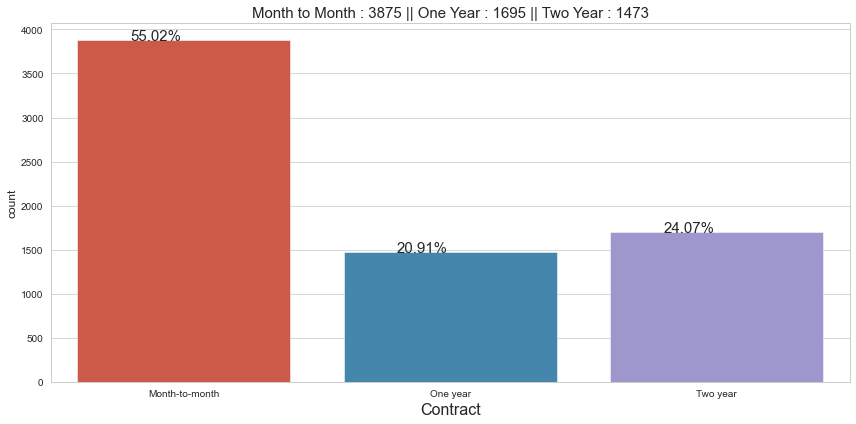

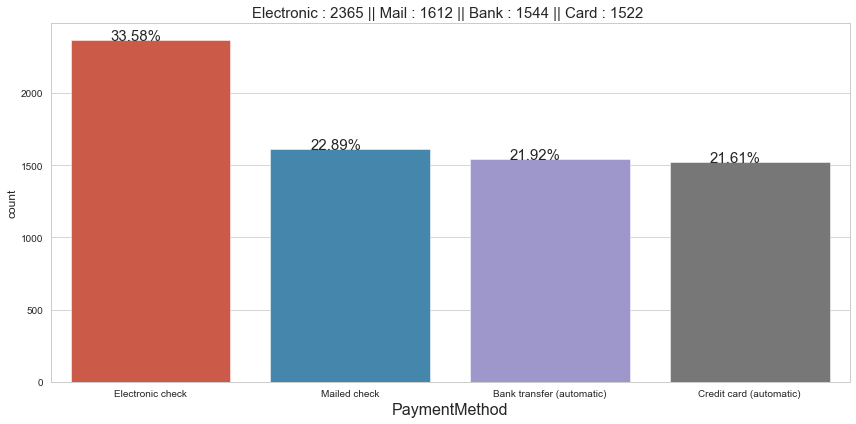

In [27]:
for col in ('Contract', 'PaymentMethod'):
    plt.figure(figsize = (12,6))
    ax  = sns.countplot(x = col, data = df)
    
    total = len(df[col])
    for val in ax.patches:
        pct = '{:.2f}%'.format(100 * val.get_height()/total)
        xpos = val.get_x() +0.2
        ypos = val.get_height() 
        ax.annotate(pct, (xpos, ypos), fontsize = 15)
        
    cat1 = df[col].value_counts()[0]
    cat2 = df[col].value_counts()[1]
    cat3 = df[col].value_counts()[2]
    cat4 = df['PaymentMethod'].value_counts()[3]    
    
    if col == 'PaymentMethod':
        plt.title(f'Electronic : {cat1} || Mail : {cat2} || Bank : {cat3} || Card : {cat4} ', fontsize = 15)
    elif col == 'InternetService':
        plt.title(f'DSL : {cat2} || Fiber Optic : {cat1} || No Service : {cat3}', fontsize = 15)
    else :
        plt.title(f'Month to Month : {cat1} || One Year : {cat2} || Two Year : {cat3}', fontsize = 15)
    
    plt.xlabel(col, fontsize = 16)
    plt.tight_layout()
    plt.show()

### CONTINOUS VARIABLES

In [28]:
df_cont = df.loc[:, df.dtypes != np.object]

In [29]:
df_cont.head()

,Tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


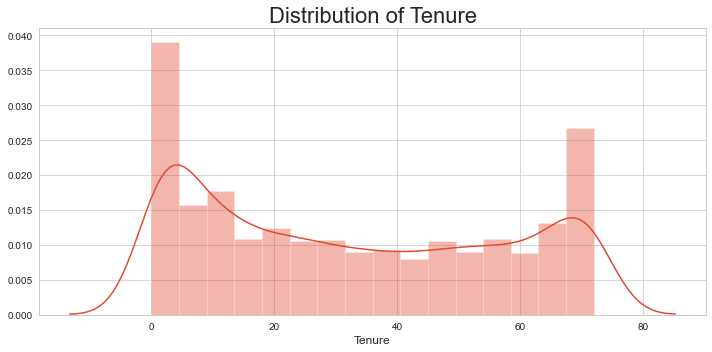

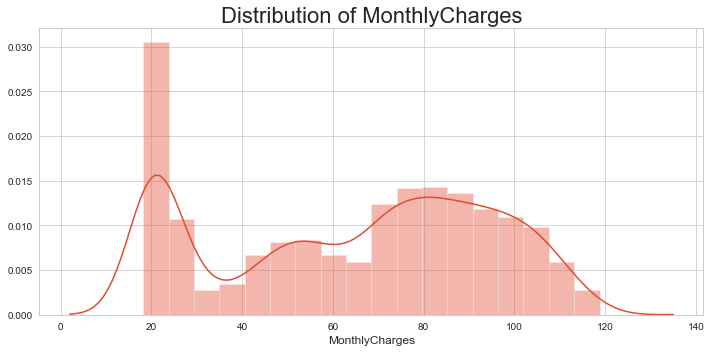

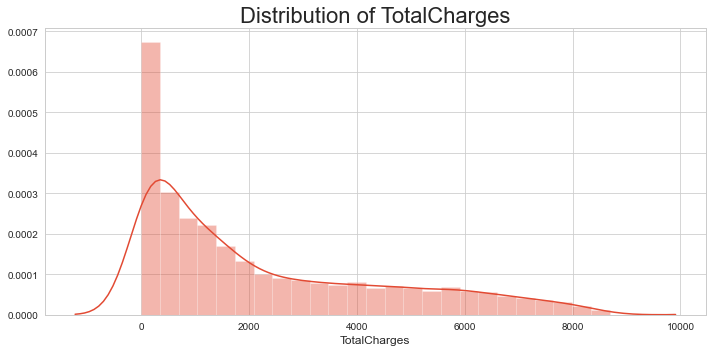

In [30]:
for col in df_cont :
    plt.figure(figsize = (10,5))
    
    sns.distplot(df[col])
    plt.xlabel(col, fontsize = 12)
    plt.title('Distribution of ' + col, fontsize = 22)
    
    plt.tight_layout()
    plt.show()

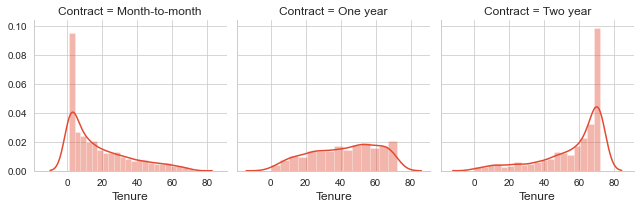

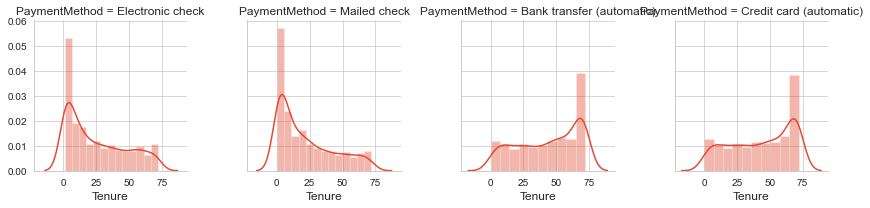

In [31]:
for col in ('Contract', 'PaymentMethod'):
    sns.FacetGrid(df, col = col).map(sns.distplot, 'Tenure')

From the plot above, we can see that the customers whom using Electronic and Mailed Check as their payment method tended to be a new customers, this indicated by their small tenures, while contrary the Bank Transfer and Credit Card are old customers or maybe their loyal one. In other word, we can infer from the pattern that maybe most of the new customers tended to use check method (either mailed or electronic) compared to loyal customer (people who have a bigger tenure) who are more likey to use automatic payment method.

However from the plot below, we can also see that most of customer who have Month to month contract have their charges spread out, the same goes for the One year contract. While on the other hand, customer whom having Two year contract mostly have their charges below 50. Interestingly, new customer who pays the bill via Electronic check, mostly have their charges around 100, while via Mailed check maybe just around 20. While compared to loyal customer who are more likey use automatic payment method having almost identical in pattern on their monthly charges.

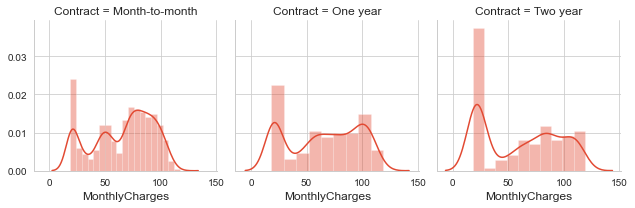

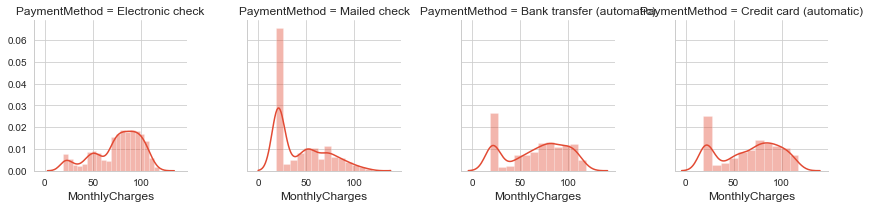

In [56]:
for col in ('Contract', 'PaymentMethod'):
    sns.FacetGrid(df, col = col).map(sns.distplot, 'MonthlyCharges')

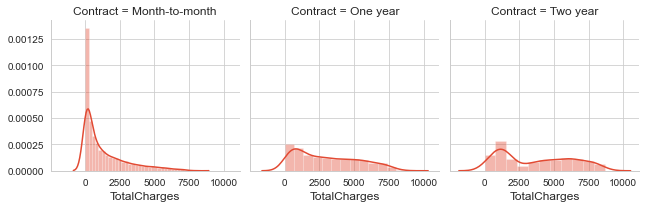

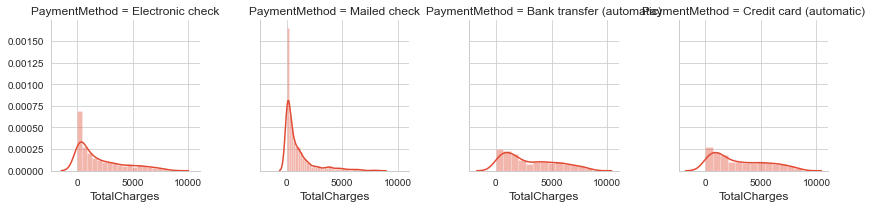

In [33]:
for col in ('Contract', 'PaymentMethod'):
    sns.FacetGrid(df, col = col).map(sns.distplot, 'TotalCharges')

### CATEGORICAL VARIABLES TO TARGET

In [34]:
df_cat = df.loc[:, df.dtypes == np.object]

In [35]:
df_cat = df_cat.drop(['customerID', 'Churn'], axis = 1)

In [36]:
df_cat.head()

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


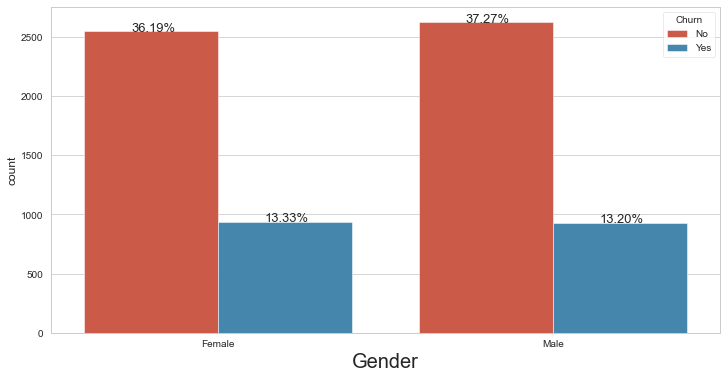

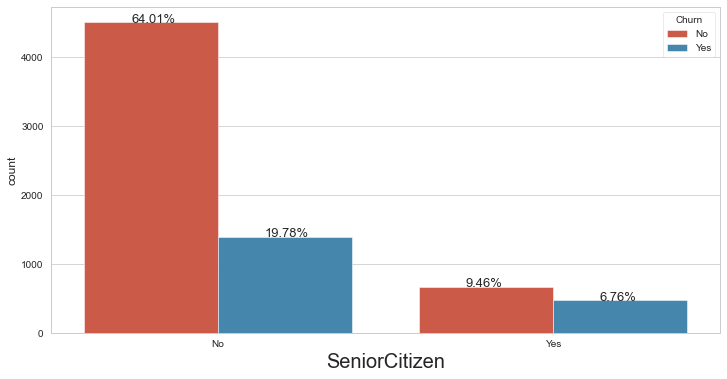

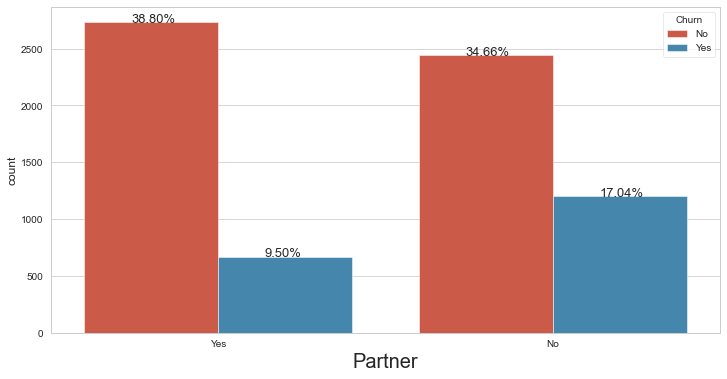

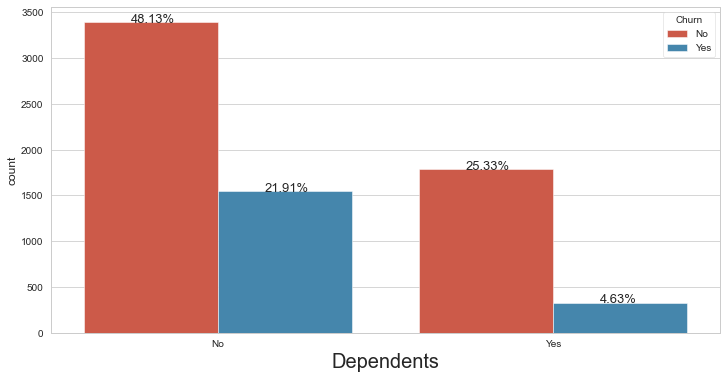

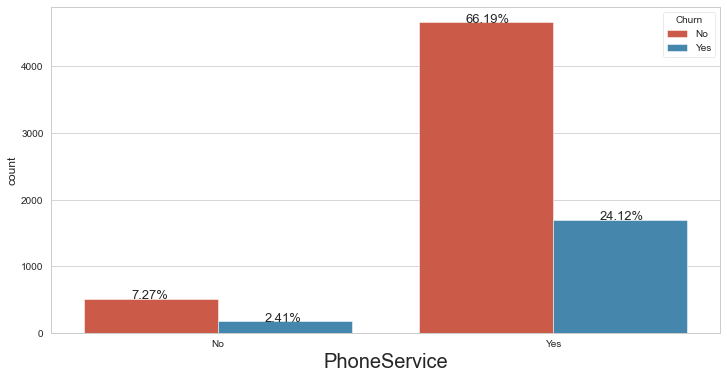

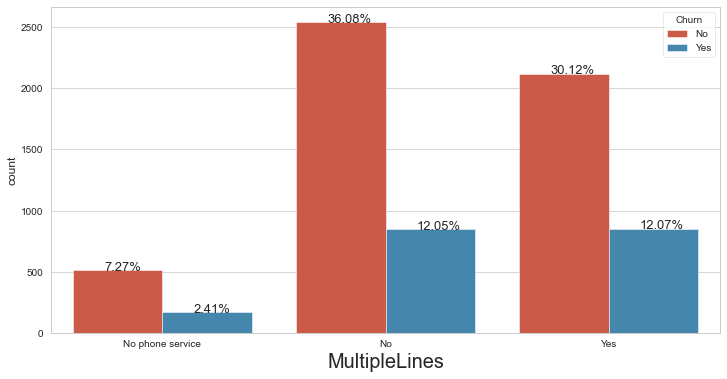

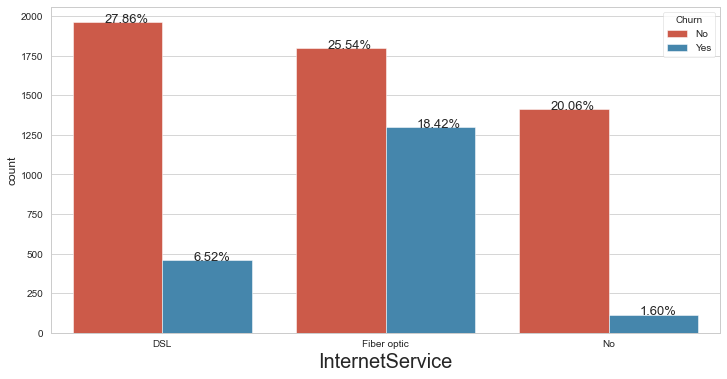

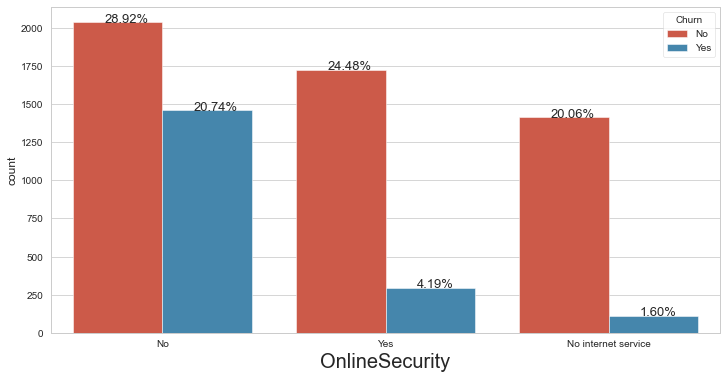

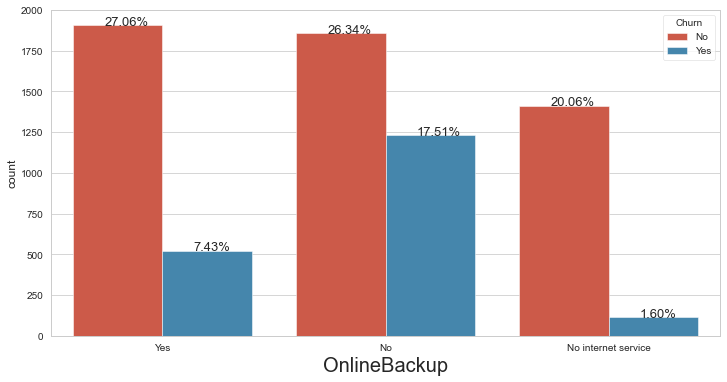

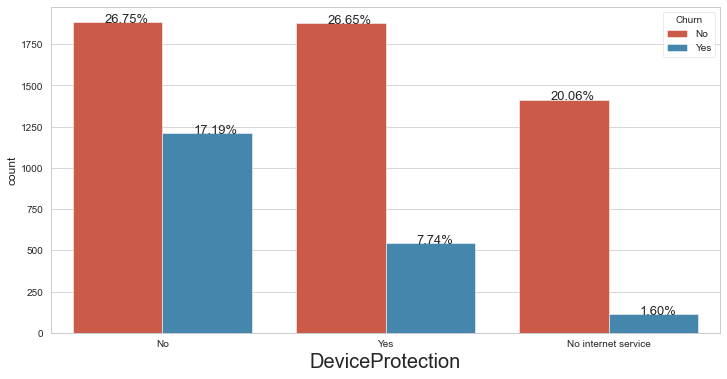

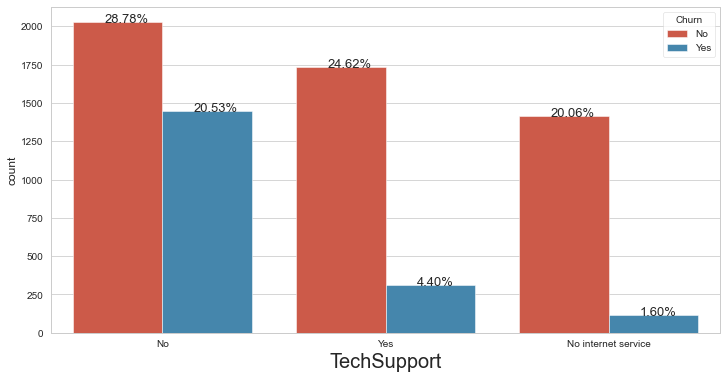

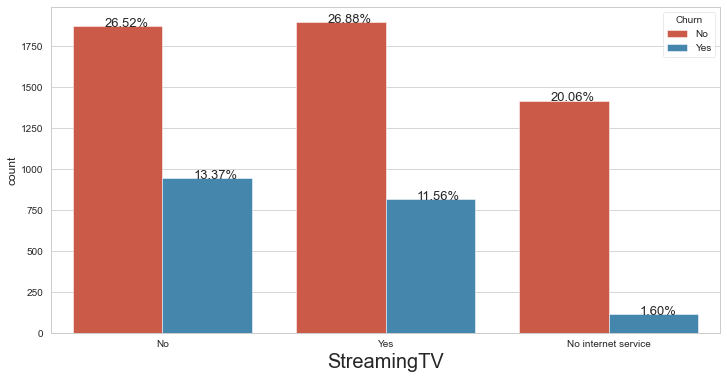

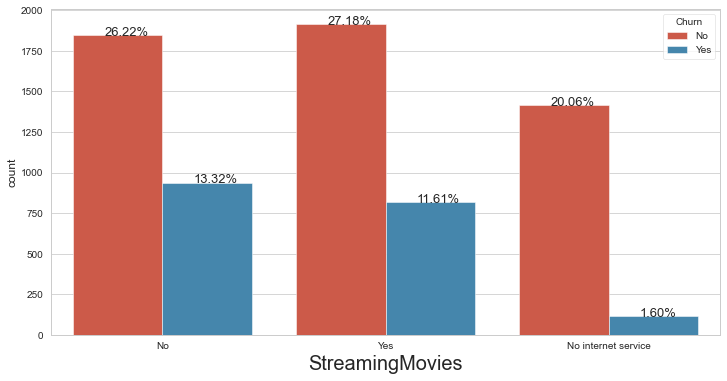

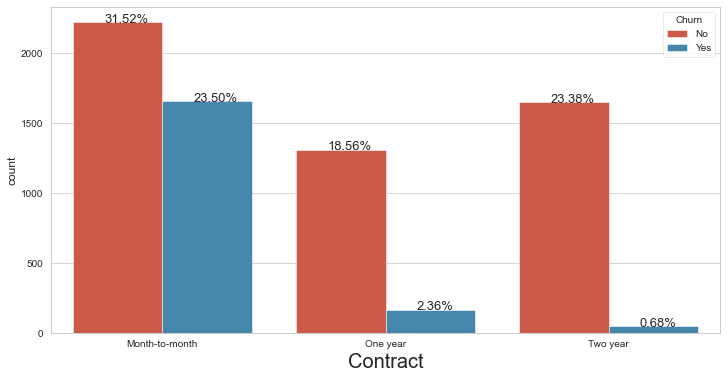

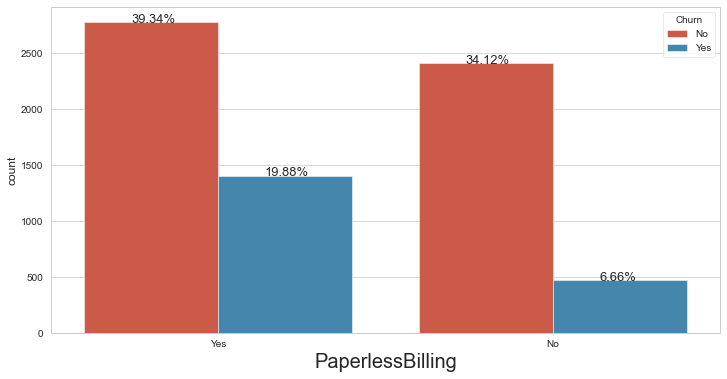

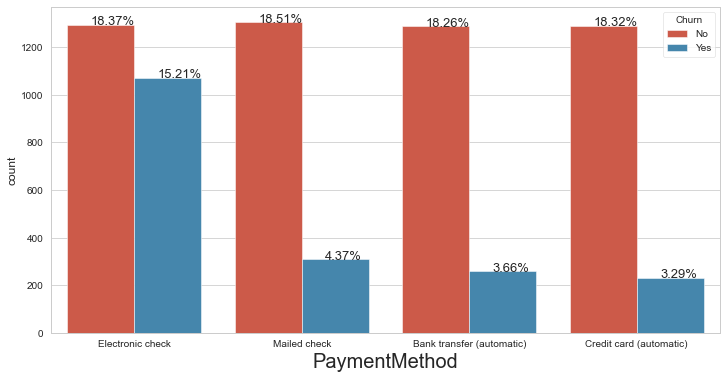

In [37]:
for col in df_cat:
    plt.figure(figsize = (12,6))
    ax = sns.countplot(x = col, data = df, hue = 'Churn')
     
    total = len(df[col])
    for val in ax.patches:
        pct = '{:.2f}%'.format(100 * val.get_height()/total)
        xpos = val.get_x() + 0.14
        ypos = val.get_height()
        ax.annotate(pct, (xpos, ypos), fontsize = 13)
        
    plt.xlabel(col, fontsize = 20)    
    plt.show()

From above information, we can infer several things :

1. Gender, PhoneService, MultipleLines appears not having a clear difference of Churned customers.


2. The other variables seems that could be possible to help the Machine Learning algorithmn predict Churn Customers.


3. The variables need to be checked with the churned customer values higher are including : Fiber Optic Internet service, No Online Security, No Online Backup, No Tech support, Month to Month Contract, and Electronic Check Payment Method.

### CONTINOUS VARIABLES TO TARGET

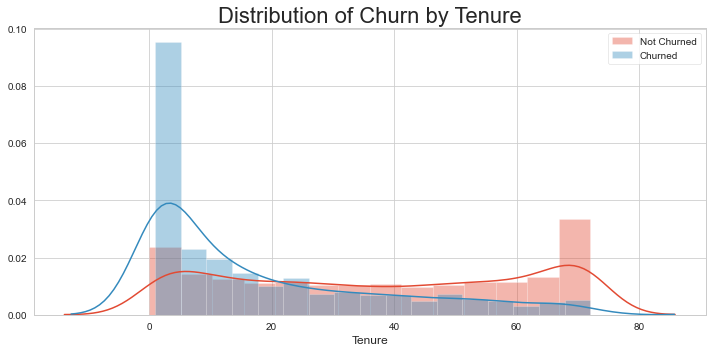

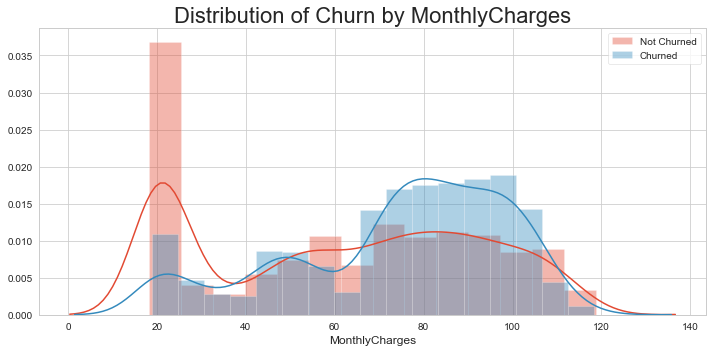

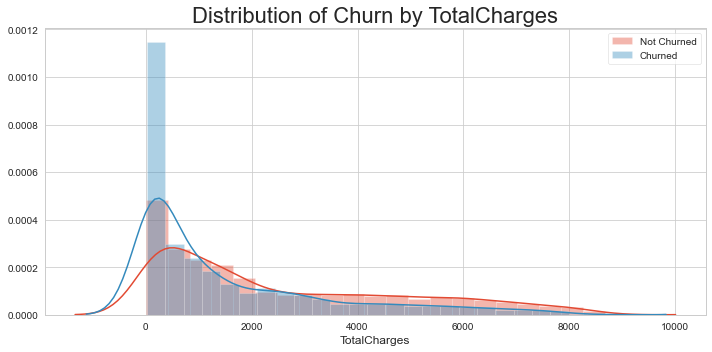

In [38]:
for col in df_cont :
    plt.figure(figsize = (10,5))
    ax = sns.distplot(df[(df['Churn'] == 'No')][col])
    ax = sns.distplot(df[(df['Churn'] == 'Yes')][col])
    
    ax.legend(['Not Churned', 'Churned'])
    
    plt.xlabel(col, fontsize = 12)
    plt.title('Distribution of Churn by ' + col, fontsize = 22)
    
    plt.tight_layout()
    plt.show()

From the plot above, we can infer that the customers who are new (tenure less than 10 months) are more likely to churn and custormers with high number of tenure are the loyal customer, thus they are less likely to churn. Moreover, the customer who churned are customer with high Monthly charges, while the other who doesn't churn are customers who have higher number of tenure and having lower monthly charges, which therefore also explains the Total charges of customers who doesn't churn are higher that customers who churn because customers who churn already left before the total charges are loaded.

### SUMMARY

In conclusion, from above information on data explorations, in general we can conclude that there are several things can be observed :

1. Attributes, method and features service such as Tenure, Contract, Paperless Billing, Monthly Charges and Internet Service appear to play a role in customer Churn as they contributed a significant amount to the Churn category.


2. There would seems to be no connection between the demographical status of customer - this refers to their Gender, Senior Citizenship status, their Partner and Dependency status to the target (Churn). As the Churn rate are both equally distributed between those variables therefore most likely, there are no pattern whatsoever within these variables to the target.


3. Customers having a service plan of Month to Month contract are more likely to Churn, moreover specificly customer with Paperless Billing, using Electronic Check as their payment method, and are within 20 months of Tenure are also more likely to Churn. 

4. On the other hand, customers with One year or Two years contract, with longer than 20 months tenure, that are not using Paperless Billing, are less likely to churn. Interestingly we can also see the pattern in the Monthly Charges, the customers who are Churned mostly having more than 60 dollar, this indicating that maybe they are having multiple services altogether. 

***Exporting Cleaned data to csv***

In [39]:
df_clean = df.copy()

In [40]:
df_clean['Churn'].replace({'No':0, 'Yes':1}, inplace = True)

In [41]:
df_clean.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [42]:
df_clean.to_csv('Telco-Customer-Churn-Clean.csv', index = False)